<a href="https://colab.research.google.com/github/aayushsharmacse/ML-DS-DA/blob/main/Gan_on_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import mnist

In [ ]:
(xtrain,_),(_,_)=mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtrain=xtrain.reshape((60000, 28, 28,1))

In [ ]:
xtrain.shape

(60000, 28, 28, 1)

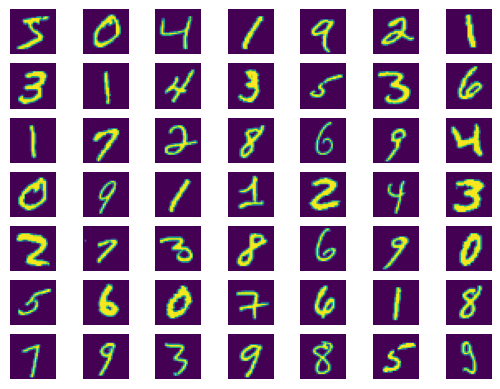

In [ ]:
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(xtrain[i])
    plt.axis('off')
plt.show()

In [ ]:
xtrain[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [ ]:
xtrain=(xtrain-127.5)/127.5

In [ ]:
xtrain

array([[[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        ...,

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]]],


       [[[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [-1.],
         [-1.]],

        [[-1.],
         [-1.],
         [-1.],
         ...,
         [-1.],
         [

In [ ]:
def generate_real_images(no_of_real_images):
    # print(no_of_real_images)
    ran_indexes=np.random.randint(0,xtrain.shape[0],no_of_real_images)
    x=xtrain[ran_indexes]
    y=np.ones((no_of_real_images,1))
    return x,y

In [ ]:
generate_real_images(5)

(array([[[[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         ...,
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]]],
 
 
        [[[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
          [-1.],
          [-1.],
          ...,
          [-1.],
          [-1.],
          [-1.]],
 
         [[-1.],
    

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,LeakyReLU
from tensorflow.keras.optimizers import Adam

In [ ]:
def discriminator_model(in_shape=(28,28,1)):
    in_shape=(28,28,1)
    model=Sequential()
    model.add(Conv2D(64,(3,3),padding='same',input_shape=in_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(64,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256,(3,3),strides=(2,2),padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    opt=Adam(0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model

In [ ]:
d_model=discriminator_model()

In [ ]:
d_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 64)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 7, 7, 128)         0         
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 256)        

In [ ]:
from tensorflow.keras.layers import Reshape,Conv2DTranspose

In [ ]:
def generator_model(latent_dim=100):
    model=Sequential()
    model.add(Dense(4096,input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((4,4,256)))
    model.add(Conv2DTranspose(256,(4,4),padding="same",strides=(2,2)))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(LeakyReLU(0.2))
    model.add(Dense(7*7*256))
    model.add(Reshape((7,7,256)))
    model.add(Conv2DTranspose(128,(4,4),padding="same",strides=(2,2)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64,(4,4),padding="same",strides=(2,2)))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(1,(3,3),activation="tanh",padding="same"))
    model.summary()
    return model

In [ ]:
def get_latent_points(n_samples,latent_dim=100):
    x=np.random.randn(latent_dim*n_samples)
    x=x.reshape((n_samples,latent_dim))
    return x

In [ ]:
def generate_fake_images(no_of_fake_images,g_model,latent_dim=100):
    x=get_latent_points(no_of_fake_images,latent_dim)
    x=g_model.predict(x)
    y=np.zeros((no_of_fake_images,1))
    return x,y

In [ ]:
g_model=generator_model()
# g_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4096)              413696    
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 4096)              0         
                                                                 
 reshape_2 (Reshape)         (None, 4, 4, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 8, 8, 256)         1048832   
 Transpose)                                                      
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 8, 8, 256)         0         
                                                                 
 flatten_3 (Flatten)         (None, 16384)             0         
                                                      

In [ ]:
x,y=generate_fake_images(10,g_model)

1/1 [==============================] - 1s 644ms/step


In [ ]:
x.shape

(10, 28, 28, 1)

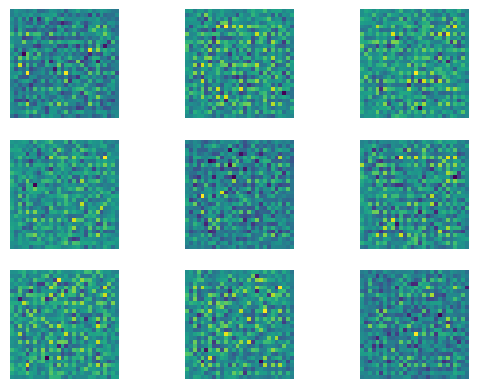

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x[i])
    plt.axis('off')
plt.show()

In [ ]:
#checking purpose only not main
def train_discriminator(d_model,dataset,n_iter,g_model,n_batch=128):
    ns=int(n_batch/2)
    for i in range(n_iter):
        xreal,yreal=generate_real_images(ns)
        _,real_accu=d_model.train_on_batch(xreal,yreal)
        xfake,yfake=generate_fake_images(ns,g_model)
        _,fake_accu=d_model.train_on_batch(xfake,yfake)
        print('iteration',i,"--accuracy on real=",real_accu,"--accuracy on fake=",fake_accu)

In [ ]:
# d_model.train_on_batch(xtrain[[i for i in range(1000)]],np.ones((1000,1)))

In [ ]:
# d_model.predict(x)

In [ ]:
# train_discriminator(d_model,xtrain,10,g_model,n_batch=128)

In [ ]:
def gan_model(g_model,d_model):
    d_model.trainable=False
    model=Sequential()
    model.add(g_model)
    model.add(d_model)
    opt=Adam(0.0002,beta_1=0.5)
    model.compile(loss="binary_crossentropy",optimizer=opt,metrics=["accuracy"])
    return model

In [ ]:
ganmodel=gan_model(g_model,d_model)
ganmodel.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (None, 28, 28, 1)         207652097 
                                                                 
 sequential_3 (Sequential)   (None, 1)                 410689    
                                                                 
Total params: 208062786 (793.70 MB)
Trainable params: 207652097 (792.13 MB)
Non-trainable params: 410689 (1.57 MB)
_________________________________________________________________


In [ ]:
def final_train(g_model,d_model,gan_model,dataset,latent_dim=100,epochs=3000,batch_no=300,batch_size=128):
    # no_per_batch=int(dataset.shape[0]/batch_no)
    half_batch=int(batch_size/2)
    ns=int(half_batch/2)
    for i in range(epochs):
        xreal,yreal=generate_real_images(ns)
        real_loss,real_accu=d_model.train_on_batch(xreal,yreal)
        xfake,yfake=generate_fake_images(ns,g_model)
        fake_loss,fake_accu=d_model.train_on_batch(xfake,yfake)
        x=get_latent_points(half_batch,latent_dim)
        y=np.ones((half_batch,1))
        loss,gan_acu=ganmodel.train_on_batch(x,y)
        if(i%10):
            print('iteration',i,"--loss on real train data=",real_loss,"--loss on fake train data=",fake_loss," gan accuracy=",gan_acu)
        if(i%20==0):
            # print("---------------------------------------------------------------------------------------------------------------------")
            xreal2,yreal2=generate_real_images(ns)
            _,real_accu2=d_model.evaluate(xreal2,yreal2,verbose=0)
            xfake2,yfake2=generate_fake_images(ns,g_model)
            _,fake_accu2=d_model.evaluate(xfake2,yfake2,verbose=0)
            print("accuracy on real test data=",real_accu2," on fake test data",fake_accu2)
            p()
            # print("---------------------------------------------------------------------------------------------------------------------")

In [ ]:
final_train(g_model,d_model,gan_model,xtrain)

iteration 5 --loss on real train data= 0.00188982835970819 --loss on fake train data= 0.0032040441874414682  gan accuracy= 0.0
1/1 [==============================] - 1s 630ms/step
iteration 6 --loss on real train data= 0.002008118201047182 --loss on fake train data= 0.003651816863566637  gan accuracy= 0.0
1/1 [==============================] - 1s 611ms/step


In [ ]:
def p(a=0):
  x,y=generate_fake_images(49,g_model)
  for i in range(49):
      plt.subplot(7,7,i+1)
      plt.imshow(x[i])
      plt.axis('off')
  plt.show()

2/2 [==============================] - 1s 380ms/step


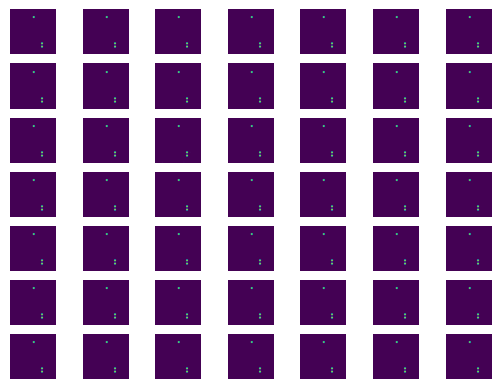

In [ ]:
p()